# Total field anomaly - Solid sphere

**This notebook exemplifies how to calculate magnetic anomaly due to a solid sphere with its center located undersurface and describe as $x_e$, $y_e$, $z_e$. This implementation is based on Blakely (1996).**

**The total field anomaly is calculated by two differents formulations:**
* 1 - Usual total field anomaly:
## $$ \Delta T = |\,\mathbf{F} + \mathbf{B}\,| - 
|\,\mathbf{F}\,|$$
where $|\,\mathbf{F}\,|$ is the magnetic intensity and $|\,\mathbf{B}\,|$ is the magnetic induction produced on the observation points $(x_i, y_i, z_i)$.


* 2 - Approximated total field anomaly:
## $$ \Delta T_i = \mathbf{\hat{F^t}}\,\mathbf{B_i}$$
where $\mathbf{\hat{F^t}}$ is the unitary vector with same direction on the geomagnetic field $\mathbf{F}$.

**The second implementation is used on Fatiando a Terra.**

In [1]:
# Importing all usefull libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Positions and number of points
n = 1000
x = np.linspace(-2000, 2000, n)
y = np.copy(x)
z = -200.
# Computes the mesh of all points
X, Y = np.meshgrid(x, y)

In [3]:
# Setting the parameters for a sphere
model = [0., 0., 500., 250., 2.5] # meters + A/m2

# Writing inclination, declination, azimuth 
field = [65., 35.] # regional field
direc = [28., -22.] # source

In [5]:
# Importing all modules
from codes.sphere import sphere_bx, sphere_by, sphere_bz
from codes.statistical import analysis
from codes.auxiliars import addnoise

In [6]:
# Calculating the B components
# X component
bx = sphere_bx(x, y, z, model, direc)
Bx = sphere_bx(X, Y, z, model, direc)
# Y component
by = sphere_by(x, y, z, model, direc)
By = sphere_by(X, Y, z, model, direc)
# Z component
bz = sphere_bz(x, y, z, model, direc)
Bz = sphere_bz(X, Y, z, model, direc)

In [8]:
# Analyzing the data
_ = analysis(Bx, 'nT')
print
_ = analysis(By, 'nT')
print
_ = analysis(Bz, 'nT')

Minimum:    -45.1018 nT
Maximum:    19.8653 nT
Mean value: -1.0211 nT
Variation:  64.9671 nT

Minimum:    -22.3246 nT
Maximum:    30.5587 nT
Mean value: 0.4125 nT
Variation:  52.8833 nT

Minimum:    -20.5437 nT
Maximum:    65.0475 nT
Mean value: 1.1711 nT
Variation:  85.5912 nT


In [9]:
# Adding noise
# 1) Profiles
bxnoise = addnoise(bx, 1., 0.1)
bynoise = addnoise(by, 0.5, 0.1)
bznoise = addnoise(bz, 1., 0.1)
# 2) Maps
Bxnoise = addnoise(Bx, 1., 0.1)
Bynoise = addnoise(By, 0.5, 0.1)
Bznoise = addnoise(Bz, 1., 0.1)

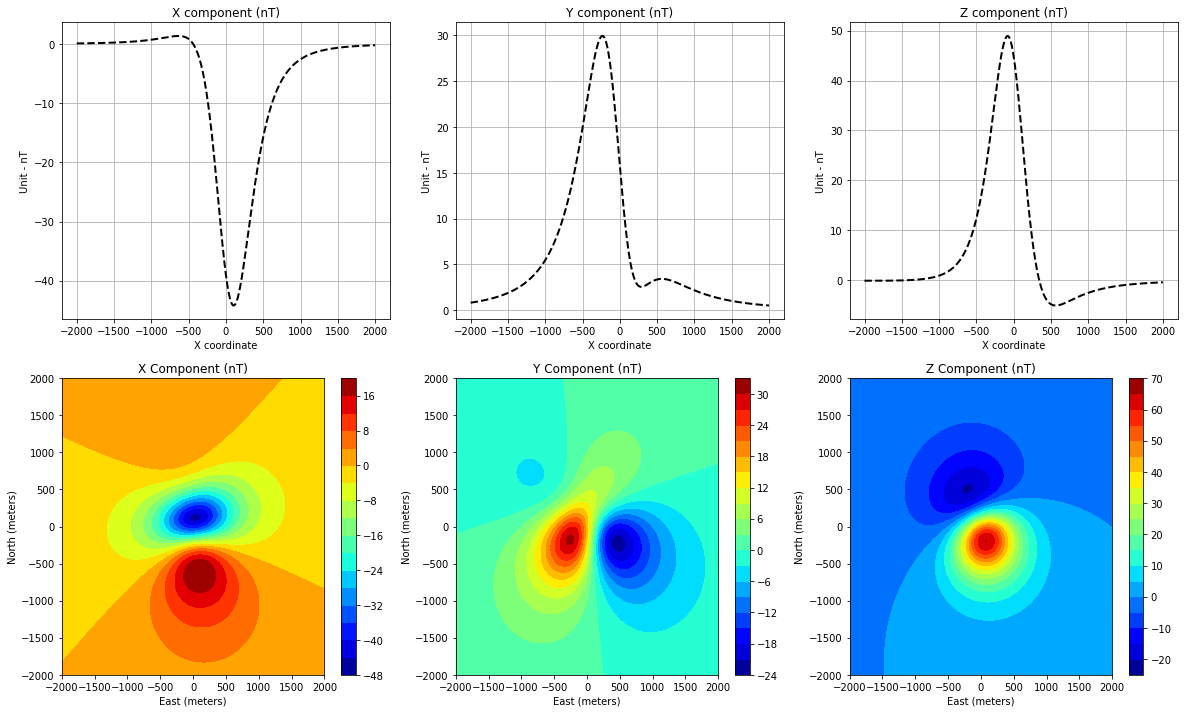

In [11]:
# Ploting all results 
plt.close('all')
plt.figure(figsize=(20,12))

plt.subplot(2, 3, 1)
plt.plot(x, bx, 'k--', linewidth = 2)
plt.title('X component (nT)')
plt.xlabel('X coordinate')
plt.ylabel('Unit - nT')
plt.grid()

plt.subplot(2, 3, 2)
plt.plot(x, by, 'k--', linewidth = 2)
plt.title('Y component (nT)')
plt.xlabel('X coordinate')
plt.ylabel('Unit - nT')
plt.grid()

plt.subplot(2, 3, 3)
plt.plot(x, bz, 'k--', linewidth = 2)
plt.title('Z component (nT)')
plt.xlabel('X coordinate')
plt.ylabel('Unit - nT')
plt.grid()

plt.subplot(2, 3, 4)
plt.contourf(Y, X, Bx, 20, cmap = plt.cm.jet)
plt.title('X Component (nT)')
plt.xlabel('East (meters)')
plt.ylabel('North (meters)')
plt.colorbar()

plt.subplot(2, 3, 5)
plt.contourf(Y, X, By, 20, cmap = plt.cm.jet)
plt.title('Y Component (nT)')
plt.xlabel('East (meters)')
plt.ylabel('North (meters)')
plt.colorbar()

plt.subplot(2, 3, 6)
plt.contourf(Y, X, Bz, 20, cmap = plt.cm.jet)
plt.title('Z Component (nT)')
plt.xlabel('East (meters)')
plt.ylabel('North (meters)')
plt.colorbar()

plt.savefig('figures/sphere-induced-free.png')
plt.show()

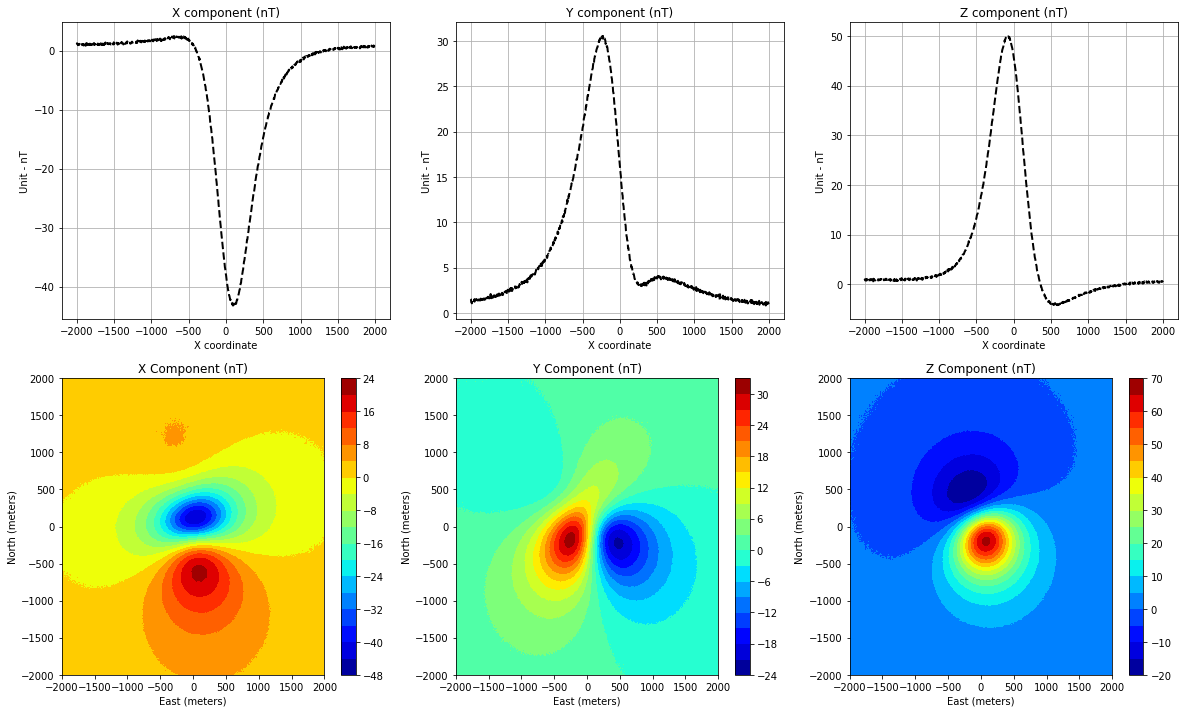

In [12]:
# Ploting all results 
plt.close('all')
plt.figure(figsize=(20,12))

plt.subplot(2, 3, 1)
plt.plot(x, bxnoise, 'k--', linewidth = 2)
plt.title('X component (nT)')
plt.xlabel('X coordinate')
plt.ylabel('Unit - nT')
plt.grid()

plt.subplot(2, 3, 2)
plt.plot(x, bynoise, 'k--', linewidth = 2)
plt.title('Y component (nT)')
plt.xlabel('X coordinate')
plt.ylabel('Unit - nT')
plt.grid()

plt.subplot(2, 3, 3)
plt.plot(x, bznoise, 'k--', linewidth = 2)
plt.title('Z component (nT)')
plt.xlabel('X coordinate')
plt.ylabel('Unit - nT')
plt.grid()

plt.subplot(2, 3, 4)
plt.contourf(Y, X, Bxnoise, 20, cmap = plt.cm.jet)
plt.title('X Component (nT)')
plt.xlabel('East (meters)')
plt.ylabel('North (meters)')
plt.colorbar()

plt.subplot(2, 3, 5)
plt.contourf(Y, X, Bynoise, 20, cmap = plt.cm.jet)
plt.title('Y Component (nT)')
plt.xlabel('East (meters)')
plt.ylabel('North (meters)')
plt.colorbar()

plt.subplot(2, 3, 6)
plt.contourf(Y, X, Bznoise, 20, cmap = plt.cm.jet)
plt.title('Z Component (nT)')
plt.xlabel('East (meters)')
plt.ylabel('North (meters)')
plt.colorbar()

plt.savefig('figures/sphere-induced-noised.png')
plt.show()

In [13]:
# Importing modules for total field calculation and auxiliars
from codes.sphere import sphere_tf, sphere_tfa
from codes.statistical import analysis
from codes.auxiliars import addnoise

In [15]:
# Calculating total field due to a solid prims - usual calculation
# 1 - Simple profile
tf = sphere_tf(x, y, z, model, direc, field, 23500.)
# 2 - Contour map
TF = sphere_tf(X, Y, z, model, direc, field, 23500.)

In [20]:
# Calculating total field due to a solid prims - approxiimation
# 1 - Simple profile
tfa = sphere_tfa(x, y, z, model, direc, field)
# 2 - Contour map
TFa = sphere_tfa(X, Y, z, model, direc, field)

In [21]:
# Analyzing
_ = analysis(TF, 'nT')
print
_ = analysis(TFa, 'nT')

Minimum:    -22.4498 nT
Maximum:    58.6569 nT
Mean value: 0.8102 nT
Variation:  81.1067 nT

Minimum:    -22.4552 nT
Maximum:    58.6447 nT
Mean value: 0.8079 nT
Variation:  81.1000 nT


In [36]:
# Adding noise to the data
# Calculated total field
tf_noise = addnoise(tf, 3., 0.1)
TF_noise = addnoise(TF, 3., 0.1)

# Approximated total field
tfa_noise = addnoise(tfa, 3., 0.1)
TFa_noise = addnoise(TFa, 3., 0.1)

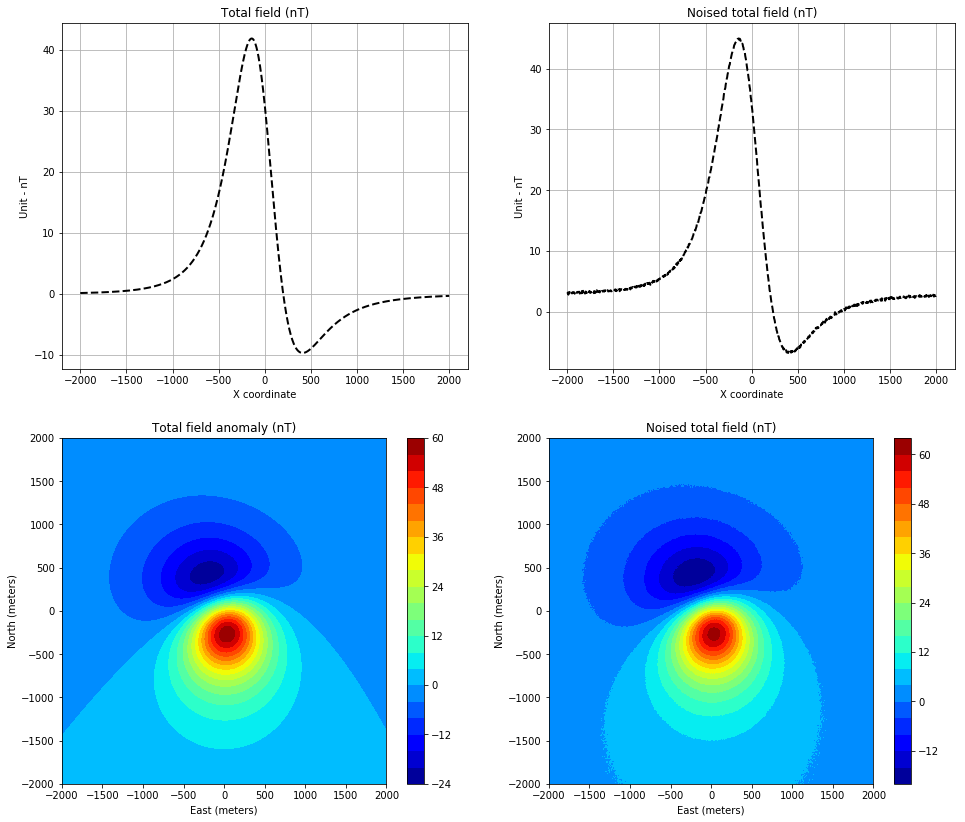

In [38]:
# Plotting the result for usual total field anomaly calculation
plt.close('all')
plt.figure(figsize=(16,14))
plt.subplot(2, 2, 1)
plt.plot(x, tf, 'k--', linewidth = 2)
plt.title('Total field (nT)')
plt.xlabel('X coordinate')
plt.ylabel('Unit - nT')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(x, tf_noise, 'k--', linewidth = 2)
plt.title('Noised total field (nT)')
plt.xlabel('X coordinate')
plt.ylabel('Unit - nT')
plt.grid()

plt.subplot(2, 2, 3)
plt.contourf(Y, X, TF, 20, cmap = plt.cm.jet)
plt.title('Total field anomaly (nT)')
plt.xlabel('East (meters)')
plt.ylabel('North (meters)')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.contourf(Y, X, TF_noise, 20, cmap = plt.cm.jet)
plt.title('Noised total field (nT)')
plt.xlabel('East (meters)')
plt.ylabel('North (meters)')
plt.colorbar()

plt.savefig('figures/sphere-totalfield(1).png')
plt.show()

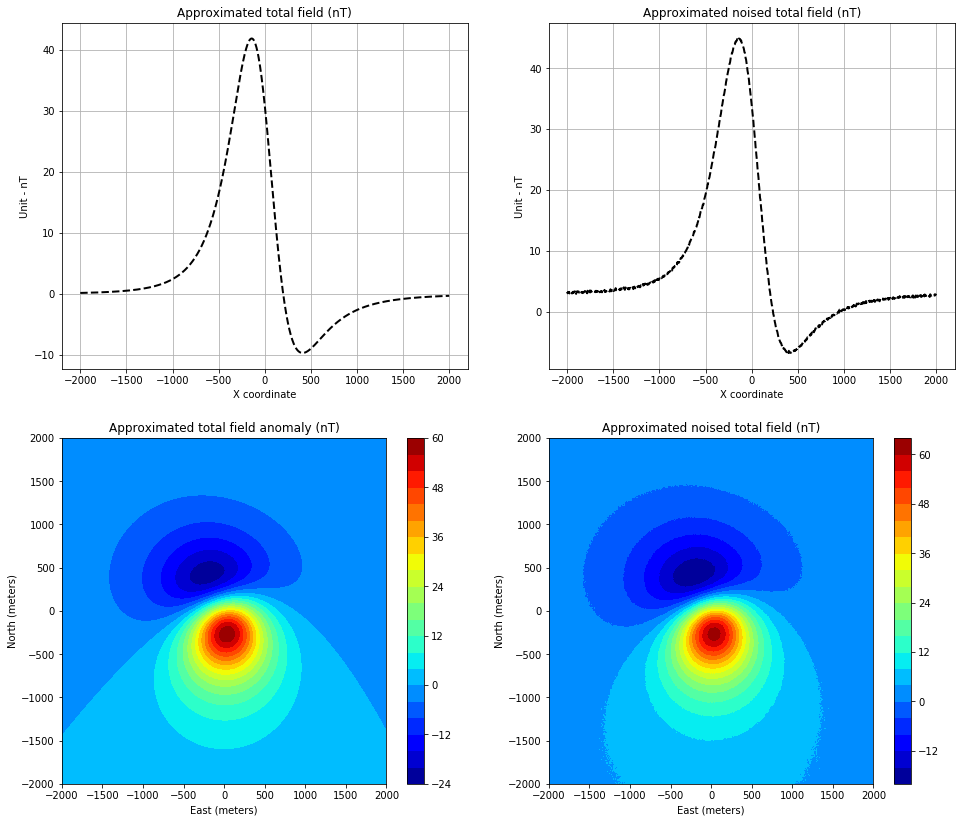

In [39]:
# Plotting the result for approximated total field anomaly
plt.close('all')
plt.figure(figsize=(16,14))
plt.subplot(2, 2, 1)
plt.plot(x, tfa, 'k--', linewidth = 2)
plt.title('Approximated total field (nT)')
plt.xlabel('X coordinate')
plt.ylabel('Unit - nT')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(x, tfa_noise, 'k--', linewidth = 2)
plt.title('Approximated noised total field (nT)')
plt.xlabel('X coordinate')
plt.ylabel('Unit - nT')
plt.grid()

plt.subplot(2, 2, 3)
plt.contourf(Y, X, TFa, 20, cmap = plt.cm.jet)
plt.title('Approximated total field anomaly (nT)')
plt.xlabel('East (meters)')
plt.ylabel('North (meters)')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.contourf(Y, X, TFa_noise, 20, cmap = plt.cm.jet)
plt.title('Approximated noised total field (nT)')
plt.xlabel('East (meters)')
plt.ylabel('North (meters)')
plt.colorbar()

plt.savefig('figures/sphere-totalfield(2).png')
plt.show()